<h1><center>K-Means Clustering</center></h1>

## Introdução

Existem muitos modelos para **clustering** por aí. Neste aula, apresentaremos o modelo considerado um dos modelos mais simples entre eles. Apesar de sua simplicidade, o **K-means** é amplamente usado para clustering em muitos aplicativos de ciência de dados, é especialmente útil se você precisar descobrir rapidamente insights a partir de **dados não rotulados**. Nesta aula, você aprenderá a usar o k-Means para segmentação de clientes.

Algumas aplicações do mundo real de k-means:
- Segmentação de clientes
- Entender o que os visitantes de um website estão tentando realizar
- Reconhecimento de padrões
- Aprendizado de máquina
- Compressão de dados

Nesta aula, praticamos o agrupamento k-means com 2 exemplos:
- k-means em um conjunto de dados gerado aleatoriamente
- Uso de k-means para segmentação de clientes

# Importando os pacotes necessários

Vamos primeiro importar os pacotes necessários.
Também execute <b>%matplotlib inline </b>, já que estaremos plotando gráficos nesta seção.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# k-Means em um conjunto de dados gerados aleatoriamente
Vamos criar o nosso conjunto de dados:


Primeiro, precisamos configurar a seed aleatória. Use a função do numpy <b>random.seed()</b>, onde a seed será definida como <b>0</b>

In [2]:
np.random.seed(0)

Em seguida vamos fazer <i>conjuntos aleatórios (random clusters)</i> de pontos usando a classe <b> make_blobs </b>. A classe <b> make_blobs </b> pode ter várias entradas, mas vamos utilizar apenas estas entradas específicas: <br> <br>
<b> <u> Entrada </u> </b>
<ul>
    <li> <b>n_samples</b>: O número total de pontos igualmente divididos entre clusters. </li>
    <ul> <li>O valor será: 5000 </li> </ul>
    <li> <b>centers</b>: O número de centros a serem gerados ou as localizões centrais fixas.</li>
    <ul> <li>O valor será: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: O desvio padrão dos clusters. </li>
    <ul> <li>O valor será: 0.9 </li> </ul>
</ul>
<br>
<b> <u>Saída</u> </b>
<ul>
    <li> <b>X</b>: Array na forma [n_amostras, n_características]. (Matriz de características)</li>
    <ul> <li> As amostras geradas. </li> </ul> 
    <li> <b>y</b>: Array na forma [n_amostras]. (Vetor de resposta)</li>
    <ul> <li> Os rótulos inteiros para associação de cluster de cada amostra. </li> </ul>
</ul>


In [3]:
X, y = make_blobs(n_samples=500, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Exibe o gráfico de dispersão dos dados gerados aleatoriamente.

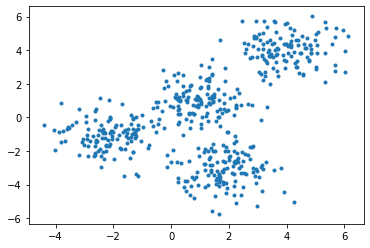

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Configurando o K-Means
Agora que geramos os nossos dados aleatórios, vamos configurar nosso K-Means Clustering.

A classe KMeans tem muitos parâmetros que podem ser usados, mas estaremos usando estes três:
<ul>
    <li> <b>init</b>: Método de inicialização dos centróides. </li>
    <ul>
        <li> O valor será: "k-means++" </li>
        <li> k-means++: Seleciona os centróides iniciais para os clusters de k-mean de uma maneira inteligente para acelerar a convergência.</li>
    </ul>
    <li> <b>n_clusters</b>: O número de clusters a serem formados, bem como o número de centróides a serem gerados. </li>
    <ul> <li> O valor será: 4 (uma vez que temos 4 centros)</li> </ul>
    <li> <b>n_init</b>: Número de vezes que o algoritmo k-means será executado com diferentes seeds (centróides). Os resultados finais serão a melhor saída de n_init execuções consecutivas em termos de "distância". </li>
    <ul> <li> O valor será: 12 </li> </ul>
</ul>

Inicialize KMeans com estes parâmetros, onde o parâmetro de saída é chamado de <b>k_means</b>.

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Agora vamos criar o modelo KMeans com a Matriz de características que criamos acima, <b>X</b>

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Agora vamos pegar os rótulos para cada ponto no modelo usando o atributo <b>.labels\_</b> do KMeans e salvá-lo como <b> k_means_labels</b>:

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 1, 0, 0, 1, 0, 2, 3, 2, 3, 2, 1, 1, 2, 0, 0, 1, 3, 3, 1, 1, 1,
       3, 3, 0, 2, 1, 2, 1, 3, 1, 0, 1, 3, 0, 0, 1, 1, 3, 3, 1, 3, 2, 1,
       2, 3, 1, 0, 0, 3, 3, 1, 1, 0, 1, 3, 0, 0, 0, 2, 3, 0, 1, 1, 3, 0,
       2, 2, 3, 3, 2, 0, 3, 0, 1, 0, 2, 3, 0, 0, 1, 1, 1, 3, 0, 2, 2, 0,
       0, 3, 2, 0, 1, 3, 0, 1, 0, 3, 3, 2, 3, 3, 3, 3, 0, 0, 2, 2, 1, 2,
       3, 3, 1, 3, 2, 3, 3, 1, 0, 0, 1, 0, 3, 0, 0, 3, 3, 2, 3, 0, 1, 1,
       0, 2, 3, 1, 3, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 3, 3, 0,
       0, 1, 2, 1, 3, 3, 0, 0, 0, 1, 2, 3, 0, 2, 2, 3, 2, 2, 2, 1, 0, 1,
       3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3, 0, 0, 3, 0, 3, 3, 2, 1, 3, 3, 2,
       3, 2, 1, 3, 0, 3, 2, 3, 1, 1, 1, 2, 3, 0, 0, 3, 2, 0, 3, 3, 1, 0,
       3, 1, 1, 2, 0, 0, 1, 3, 3, 3, 2, 3, 2, 2, 2, 1, 0, 3, 1, 3, 0, 3,
       1, 3, 2, 0, 3, 3, 0, 3, 1, 1, 2, 1, 0, 1, 3, 0, 3, 0, 2, 2, 2, 1,
       0, 0, 1, 0, 2, 0, 2, 3, 0, 1, 1, 1, 0, 3, 0, 3, 3, 1, 0, 0, 1, 3,
       0, 0, 3, 3, 2, 1, 1, 0, 1, 3, 2, 3, 2, 1, 1,

Também obteremos as coordenadas dos centros de cluster usando <b> .cluster&#95;centers&#95; </b> de KMeans e salvá-lo como <b>k_means_cluster_centers</b>

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.14789839, -1.06339975],
       [ 3.9941026 ,  4.06310266],
       [ 1.8221152 , -3.13397761],
       [ 1.02032671,  0.99435673]])

## Criando o gráfico
Então, agora que temos os dados aleatórios gerados e o modelo do KMeans inicializado, vamos plotá-los e ver como ele se parece.

Por favor, leia o código e os comentários para entender como plotar o modelo.

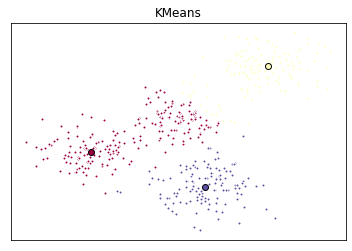

In [13]:
# Inicialize o gráfico com as dimensões especificadas.
fig = plt.figure(figsize=(6, 4))

# Colors usa um mapa de cores, que produzirá uma matriz de cores com base no
# número de marcadores existentes. Usamos set(k_means_labels) para obter os
# rótulos exclusivos.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Cria o gráfico
ax = fig.add_subplot(1, 1, 1)

# Laço de repetição que plota os pontos de dados e centróides.
# k variará de 0 a 3, o que corresponde aos possíveis grupos (cluster) que cada
# ponto pode pertencer.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Cria uma lista de todos os pontos, onde os pontos que estão 
    # no cluster (ex. Cluster 0) são rotulados como True,
    # senão eles são rotulados como False.
    my_members = (k_means_labels == k)
    
    # Define o centróide, ou centro do cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Plota os pontos com cor "col".
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plota os centróides com cor especificada, mas com um contorno mais escuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Titúlo do gráfico
ax.set_title('KMeans')

# Remove as marcações do eixo x
ax.set_xticks(())

# Remove as marcações do eixo y
ax.set_yticks(())

# Exibe o gráfico
plt.show()


## Prática
Tente agrupar o conjunto de dados acima em três clusters. **Obs.:** não gere os dados novamente, use o mesmo conjunto de dados acima.

In [12]:
# Escreva seu código aqui

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

array([2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1,

Duplo clique __aqui__ para a solução.

<!-- A resposta está abaixo:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


-->

# Segmentação de clientes com K-Means

Imagine que você tenha um conjunto de dados de clientes e aplique a __Segmentação de cliente__ nesse conjunto de dados. Segmentação de clientes é a prática de particionar uma base de clientes em grupos de indivíduos que possuem características semelhantes. É uma estratégia interessante, uma vez que uma empresa pode segmentar esses grupos específicos de clientes e alocar efetivamente recursos de marketing. Por exemplo, um grupo pode conter clientes com alto lucro e baixo risco, ou seja, com maior probabilidade de comprar produtos ou se inscrever em um serviço. Pode-se definir estratégias para reter clientes com base nessa segmentação ou qualquer outra possibilidade de ação.

O download dos dados que iremos utilizar nesse exemplo pode ser realizado por meio do IBM Object Storage, disponível em:

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

### Carregando dados do arquivo CSV
Antes de trabalhar com os dados, você deve usar a carregar o arquivo Cust_Segmentation.csv.

In [14]:
import pandas as pd
cust_df = pd.read_csv("csv/Cust_Segmentation.csv")
cust_df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


### Pré-processamento

Como você pode ver, __Address__ neste conjunto de dados é uma variável categórica. O algoritmo k-means não é diretamente aplicável a variáveis categóricas porque a função de distância euclidiana não é realmente significativa para variáveis discretas. Então, vamos descartar essa característica e executar o algoritmo de clustering.

In [15]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizando os dados
Agora vamos normalizar o conjunto de dados. Mas por que precisamos de normalização em primeiro lugar? A normalização é um método estatístico que ajuda os algoritmos baseados em matemática a interpretar recursos com diferentes magnitudes e distribuições uniforme. Usamos __StandardScaler()__ para normalizar nosso conjunto de dados.

In [16]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modelagem

Em nosso exemplo (se não tivéssemos acesso ao algoritmo k-means), seria o mesmo que adivinhar que cada grupo de clientes teria certa idade, renda, educação, etc., com múltiplos testes e experimentos. No entanto, usando o clustering K-means, podemos fazer todo esse processo muito mais fácil.

Vamos aplicar k-means em nosso conjunto de dados e observar os rótulos de cluster.

In [17]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

### Insights
Atribuímos os rótulos a cada linha do conjunto de dados.

In [18]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Podemos verificar facilmente os valores do centróide calculando a média das características em cada cluster.

In [19]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


Agora, vamos analisar a distribuição de clientes com base em sua idade (Age) e renda (Income):

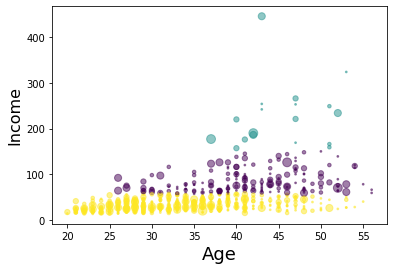

In [20]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


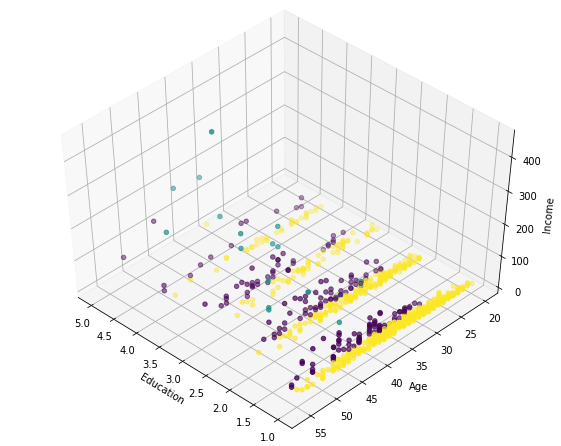

In [21]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


O k-means particionará seus clientes em grupos mutuamente exclusivos, por exemplo, em 3 conjuntos (clusters). Os clientes em cada cluster são semelhantes entre si demograficamente. Agora podemos criar um perfil para cada grupo, considerando as características comuns de cada cluster.

Por exemplo, os 3 clusters podem ser:
- Rico, Educado e Idoso
- Meia-idade e Classe Média
- Jovem e Pobre

Esta aula foi desenvolvida com base no material disponibilizado por Saeed Aghabozorgi

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>